### Test case: Transporting with a transfer hub

Runs a simulation with two vessels: one small vessel transporting goods from A to B, and one large vessel transporting goods from B to C. The second vessel is only supposed to load and depart once the level at site B reaches the capacity of the vessel.

No resource limitations apply to the sites. Scenario 1 means the small vessel can 'keep up' so no waiting once level at site B reaches threshold value. Scenario 2, the small vessel cannot keep up and hence the large vessel needs to wait multiple times (for the level at site B to reach threshold value).

#### Import libraries

In [1]:
import networkx as nx

from openclsim.plot import get_gantt_chart
from openclsim.plot.graph_dependencies import DependencyGraph
from openclsim.plot.critical_path_log import CpLog

from scenario_container_level_dependency import getActivitiesAndObjects

#### Run the simulation

In [2]:
act, obj = getActivitiesAndObjects(scenario=1)

#### Plot the Gantt chart

In [3]:
fig = get_gantt_chart(obj)

#### Check the dependencies

With the dependency graph dependecies for generic/base activities (Move, Basic, ShiftAmount) are extracted from the model setup. This excludes (time dependent) dependencies, such as start conditions based on container level and resource limitations.

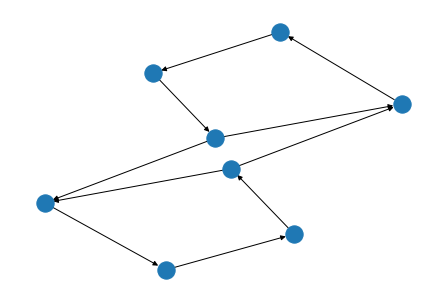

In [7]:
dep_G = DependencyGraph(act)
nx.draw(dep_G.G)

#### Get critical path log and dependencies

In [4]:
my_cp_log_l = CpLog(obj, act)
my_cp_log_l.get_dependencies()
my_cp_log_l.mark_critical_activities()
#my_cp_log_l.make_gantt_mpl()
my_cp_log_l.make_gantt_plotly()

-- total elapsed time 0.16196584701538086 seconds


### Full critical log and dependencies output
If one is interested, the logging and the dependencies as used for critical path determination can be shown.

In [5]:
print(my_cp_log_l.all_cp_dependencies)
my_cp_log_l.cp_log.head()

[('cp_activity_72', 'cp_activity_92'), ('cp_activity_17', 'cp_activity_24'), ('cp_activity_5', 'cp_activity_17'), ('cp_activity_50', 'cp_activity_31'), ('cp_activity_69', 'cp_activity_89'), ('cp_activity_73', 'cp_activity_93'), ('cp_activity_54', 'cp_activity_35'), ('cp_activity_88', 'cp_activity_48'), ('cp_activity_26', 'cp_activity_13'), ('cp_activity_101', 'cp_activity_61'), ('cp_activity_95', 'cp_activity_55'), ('cp_activity_74', 'cp_activity_94'), ('cp_activity_36', 'cp_activity_76'), ('cp_activity_96', 'cp_activity_56'), ('cp_activity_45', 'cp_activity_85'), ('cp_activity_68', 'cp_activity_88'), ('cp_activity_90', 'cp_activity_50'), ('cp_activity_31', 'cp_activity_71'), ('cp_activity_86', 'cp_activity_106'), ('cp_activity_105', 'cp_activity_65'), ('cp_activity_57', 'cp_activity_38'), ('cp_activity_49', 'cp_activity_30'), ('cp_activity_63', 'cp_activity_44'), ('cp_activity_64', 'cp_activity_45'), ('cp_activity_8', 'cp_activity_3'), ('cp_activity_3', 'cp_activity_15'), ('cp_activit

,Activity,ActivityID,SimulationObject,start_time,state,duration,end_time,cp_activity_id,is_critical
0,small vessel: loading,bd375d07-2ec1-438e-98bf-00e70539e3de,from_site A,1970-01-01 00:00:00.000000,ACTIVE,0 days 00:01:40,1970-01-01 00:01:40.000000,cp_activity_27,True
1,large vessel: sailing towards from_site,2d7c8320-2f7a-4758-a58f-8a25c5d439dd,large vessel,1970-01-01 00:00:00.000000,ACTIVE,0 days 00:04:47.782533,1970-01-01 00:04:47.782533,cp_activity_20,True
2,small vessel: loading,bd375d07-2ec1-438e-98bf-00e70539e3de,small vessel,1970-01-01 00:00:00.000000,ACTIVE,0 days 00:01:40,1970-01-01 00:01:40.000000,cp_activity_27,True
3,small vessel: sailing full,27695079-05eb-4c4a-a65a-934b61300229,small vessel,1970-01-01 00:01:40.000000,ACTIVE,0 days 00:07:11.673799,1970-01-01 00:08:51.673799,cp_activity_67,True
4,large vessel: loading,fd868b6f-ac7f-4a82-bcd3-a4854082f1b9,Activity,1970-01-01 00:04:47.782533,WAITING,0 days 00:43:40.586463,1970-01-01 00:48:28.368996,cp_activity_1,True
